<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 152.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 179.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 131.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 145.7 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Check missing values in critical columns
critical_columns = ['Employment', 'JobSat', 'RemoteWork']
print("Missing values in critical columns:\n")
print(df[critical_columns].isnull().sum())


Missing values in critical columns:

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Median Job Satisfaction Score by Experience Range:

  ExperienceRange  JobSatScore
0       0-5 years          NaN
1      5-10 years          NaN
2     10-20 years          NaN
3       >20 years          NaN

YearsCodePro Summary Statistics:

count    51610.000000
mean        10.212013
std          9.079437
min          0.500000
25%          3.000000
50%          7.000000
75%         15.000000
max         51.000000
Name: YearsCodePro, dtype: float64
Median Job Satisfaction by Experience Range:

  ExperienceRange  JobSatScore
0       0-5 years          NaN
1      5-10 years          NaN
2     10-20 years          NaN
3       >20 years          NaN


/tmp/ipykernel_300/1849913536.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSatScore'].median().reset_index()
/tmp/ipykernel_300/1849913536.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_satisfaction = df.groupby('ExperienceRange')['JobSatScore'].median().reset_index()
/tmp/ipykernel_300/1849913536.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

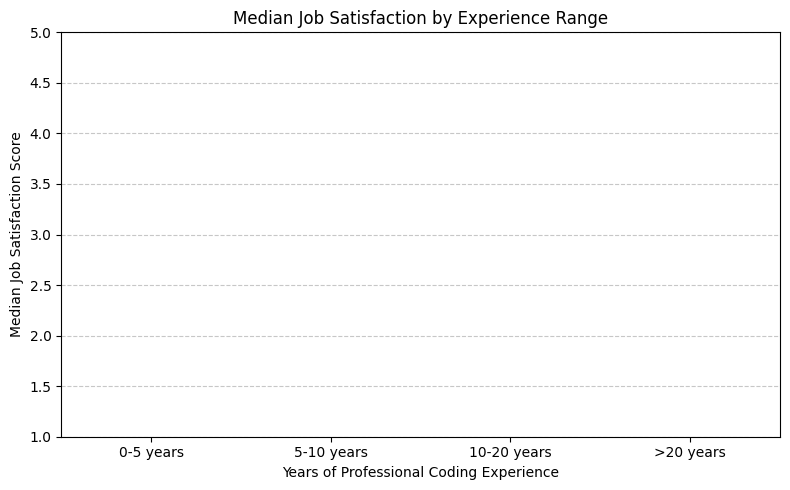

In [6]:

# Step 1: Clean and convert 'YearsCodePro'
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 2: Map JobSat to numeric scores
satisfaction_mapping = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
}
df['JobSatScore'] = df['JobSat'].map(satisfaction_mapping)

# Step 3: Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Step 4: Calculate median satisfaction per experience range
median_satisfaction = df.groupby('ExperienceRange')['JobSatScore'].median().reset_index()

# Display results
print("Median Job Satisfaction Score by Experience Range:\n")
print(median_satisfaction)

# Optional: Show summary stats of YearsCodePro
print("\nYearsCodePro Summary Statistics:\n")
print(df['YearsCodePro'].describe())

# Step 1: Clean and convert 'YearsCodePro'
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 2: Map JobSat to numeric scores
satisfaction_mapping = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
}
df['JobSatScore'] = df['JobSat'].map(satisfaction_mapping)

# Step 3: Create experience range bins
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Step 4: Calculate median JobSatScore per ExperienceRange
median_job_satisfaction = df.groupby('ExperienceRange')['JobSatScore'].median().reset_index()

# Display the result
print("Median Job Satisfaction by Experience Range:\n")
print(median_job_satisfaction)


# Convert 'YearsCodePro' to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Map 'JobSat' to numerical satisfaction scores
satisfaction_mapping = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
}
df['JobSatScore'] = df['JobSat'].map(satisfaction_mapping)

# Create experience range bins
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Calculate median JobSatScore per ExperienceRange
median_job_satisfaction = df.groupby('ExperienceRange')['JobSatScore'].median().reset_index()

# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(data=median_job_satisfaction, x='ExperienceRange', y='JobSatScore', palette='Blues_d')

plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.ylim(1, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_300/679774488.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, palette='muted')


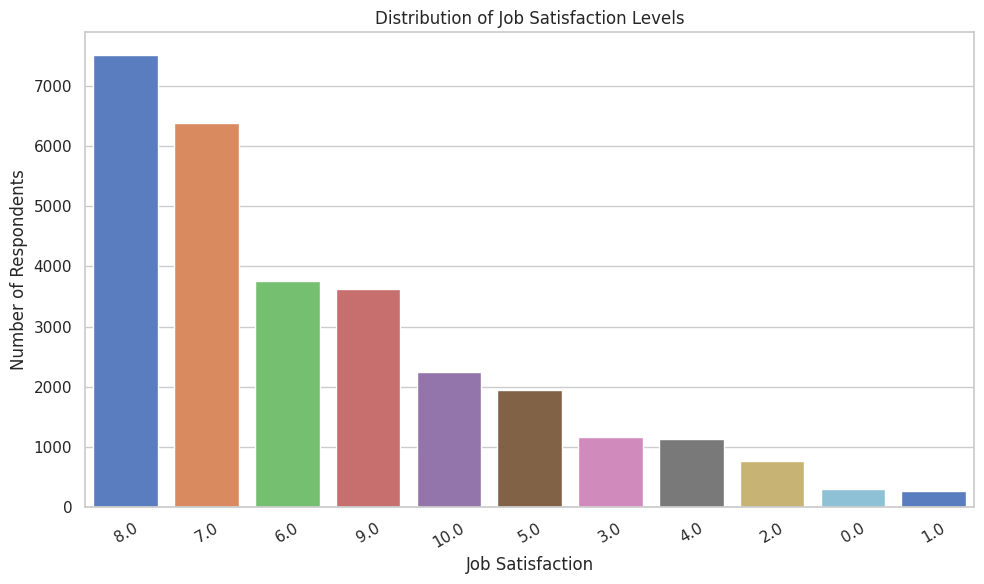

In [9]:

# Set style for better appearance
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(10, 6))

# Create a count plot of JobSat
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, palette='muted')

# Add title and labels
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_300/4091652431.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='RemoteWork', order=df_clean['RemoteWork'].value_counts().index, palette='pastel')


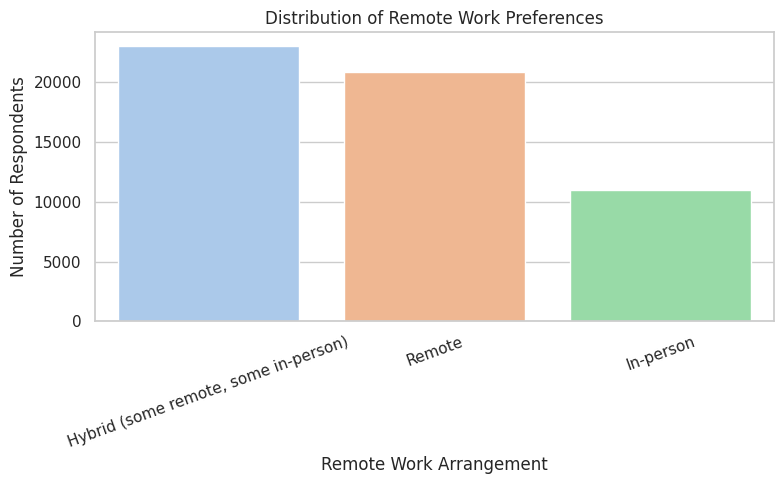

Remote Work Preferences by Employment Type:

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                                     2   
Student, full-time;Not employed, bu

In [10]:
## Write your code here
# Drop rows where RemoteWork or Employment is missing
df_clean = df[['RemoteWork', 'Employment']].dropna()

plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='RemoteWork', order=df_clean['RemoteWork'].value_counts().index, palette='pastel')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Create a crosstab
remote_employment_crosstab = pd.crosstab(df_clean['Employment'], df_clean['RemoteWork'])

# Display the crosstab
print("Remote Work Preferences by Employment Type:\n")
print(remote_employment_crosstab)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


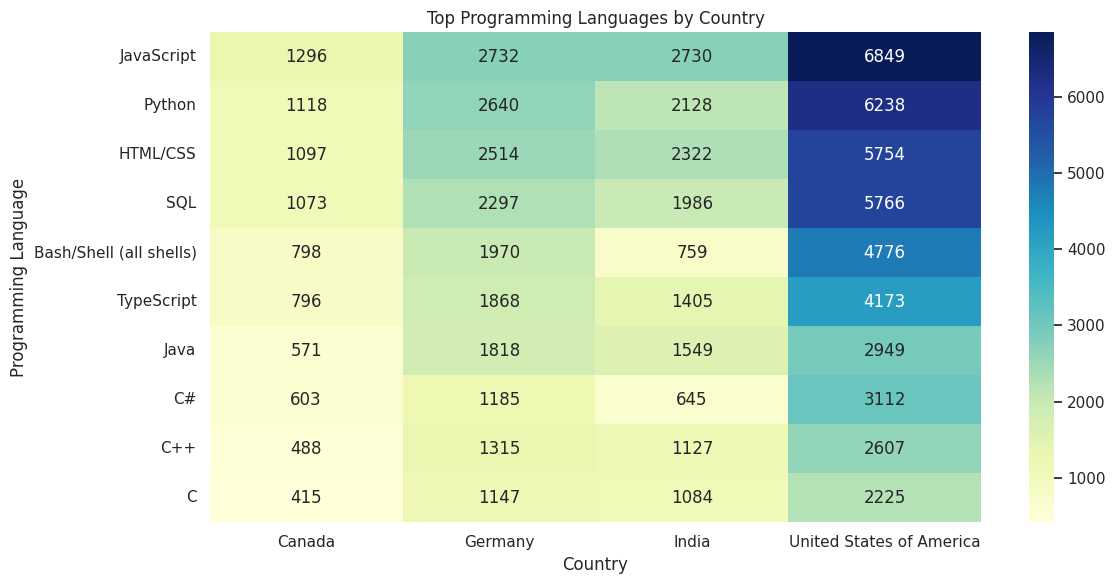

In [11]:

# Focused columns
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Optional: Focus on a few major countries (for clarity)
target_countries = ['United States of America', 'India', 'Germany', 'United Kingdom', 'Canada']
df_lang = df_lang[df_lang['Country'].isin(target_countries)]

# Split languages and explode to long format
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')

# Group and count languages by country
lang_counts = df_lang.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Pivot for heatmap
lang_pivot = lang_counts.pivot(index='LanguageHaveWorkedWith', columns='Country', values='Count').fillna(0)

# Optional: Show top 10 most-used languages overall (for a focused heatmap)
top_langs = df_lang['LanguageHaveWorkedWith'].value_counts().head(10).index
lang_pivot = lang_pivot.loc[top_langs]

# --- Plot Heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(lang_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Top Programming Languages by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


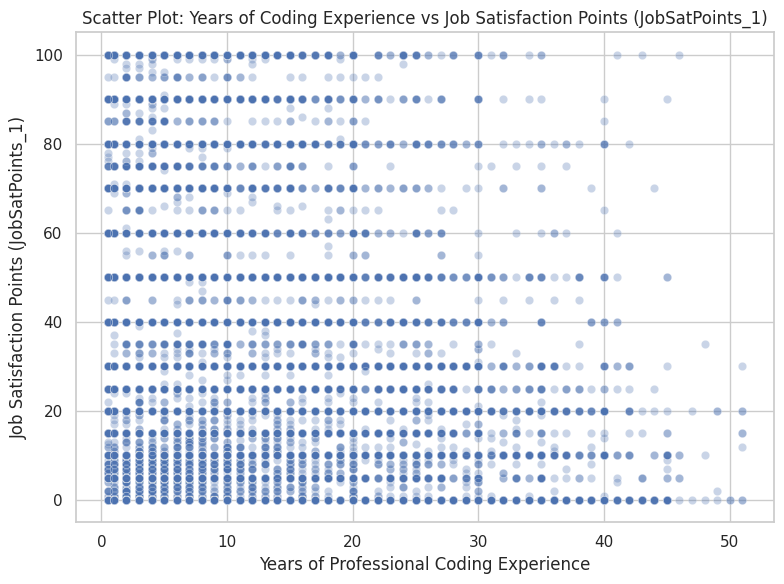

Correlation coefficient between YearsCodePro and JobSatPoints_1: -0.028


In [12]:

# Clean and convert YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Convert JobSatPoints_1 to numeric (some entries may be missing)
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in either column
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='YearsCodePro', y='JobSatPoints_1', alpha=0.3)

plt.title('Scatter Plot: Years of Coding Experience vs Job Satisfaction Points (JobSatPoints_1)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points (JobSatPoints_1)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Calculate correlation coefficient
correlation = df_clean['YearsCodePro'].corr(df_clean['JobSatPoints_1'])
print(f"Correlation coefficient between YearsCodePro and JobSatPoints_1: {correlation:.3f}")


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation: Education Level vs Employment Type

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Assoc

/tmp/ipykernel_300/2708985624.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


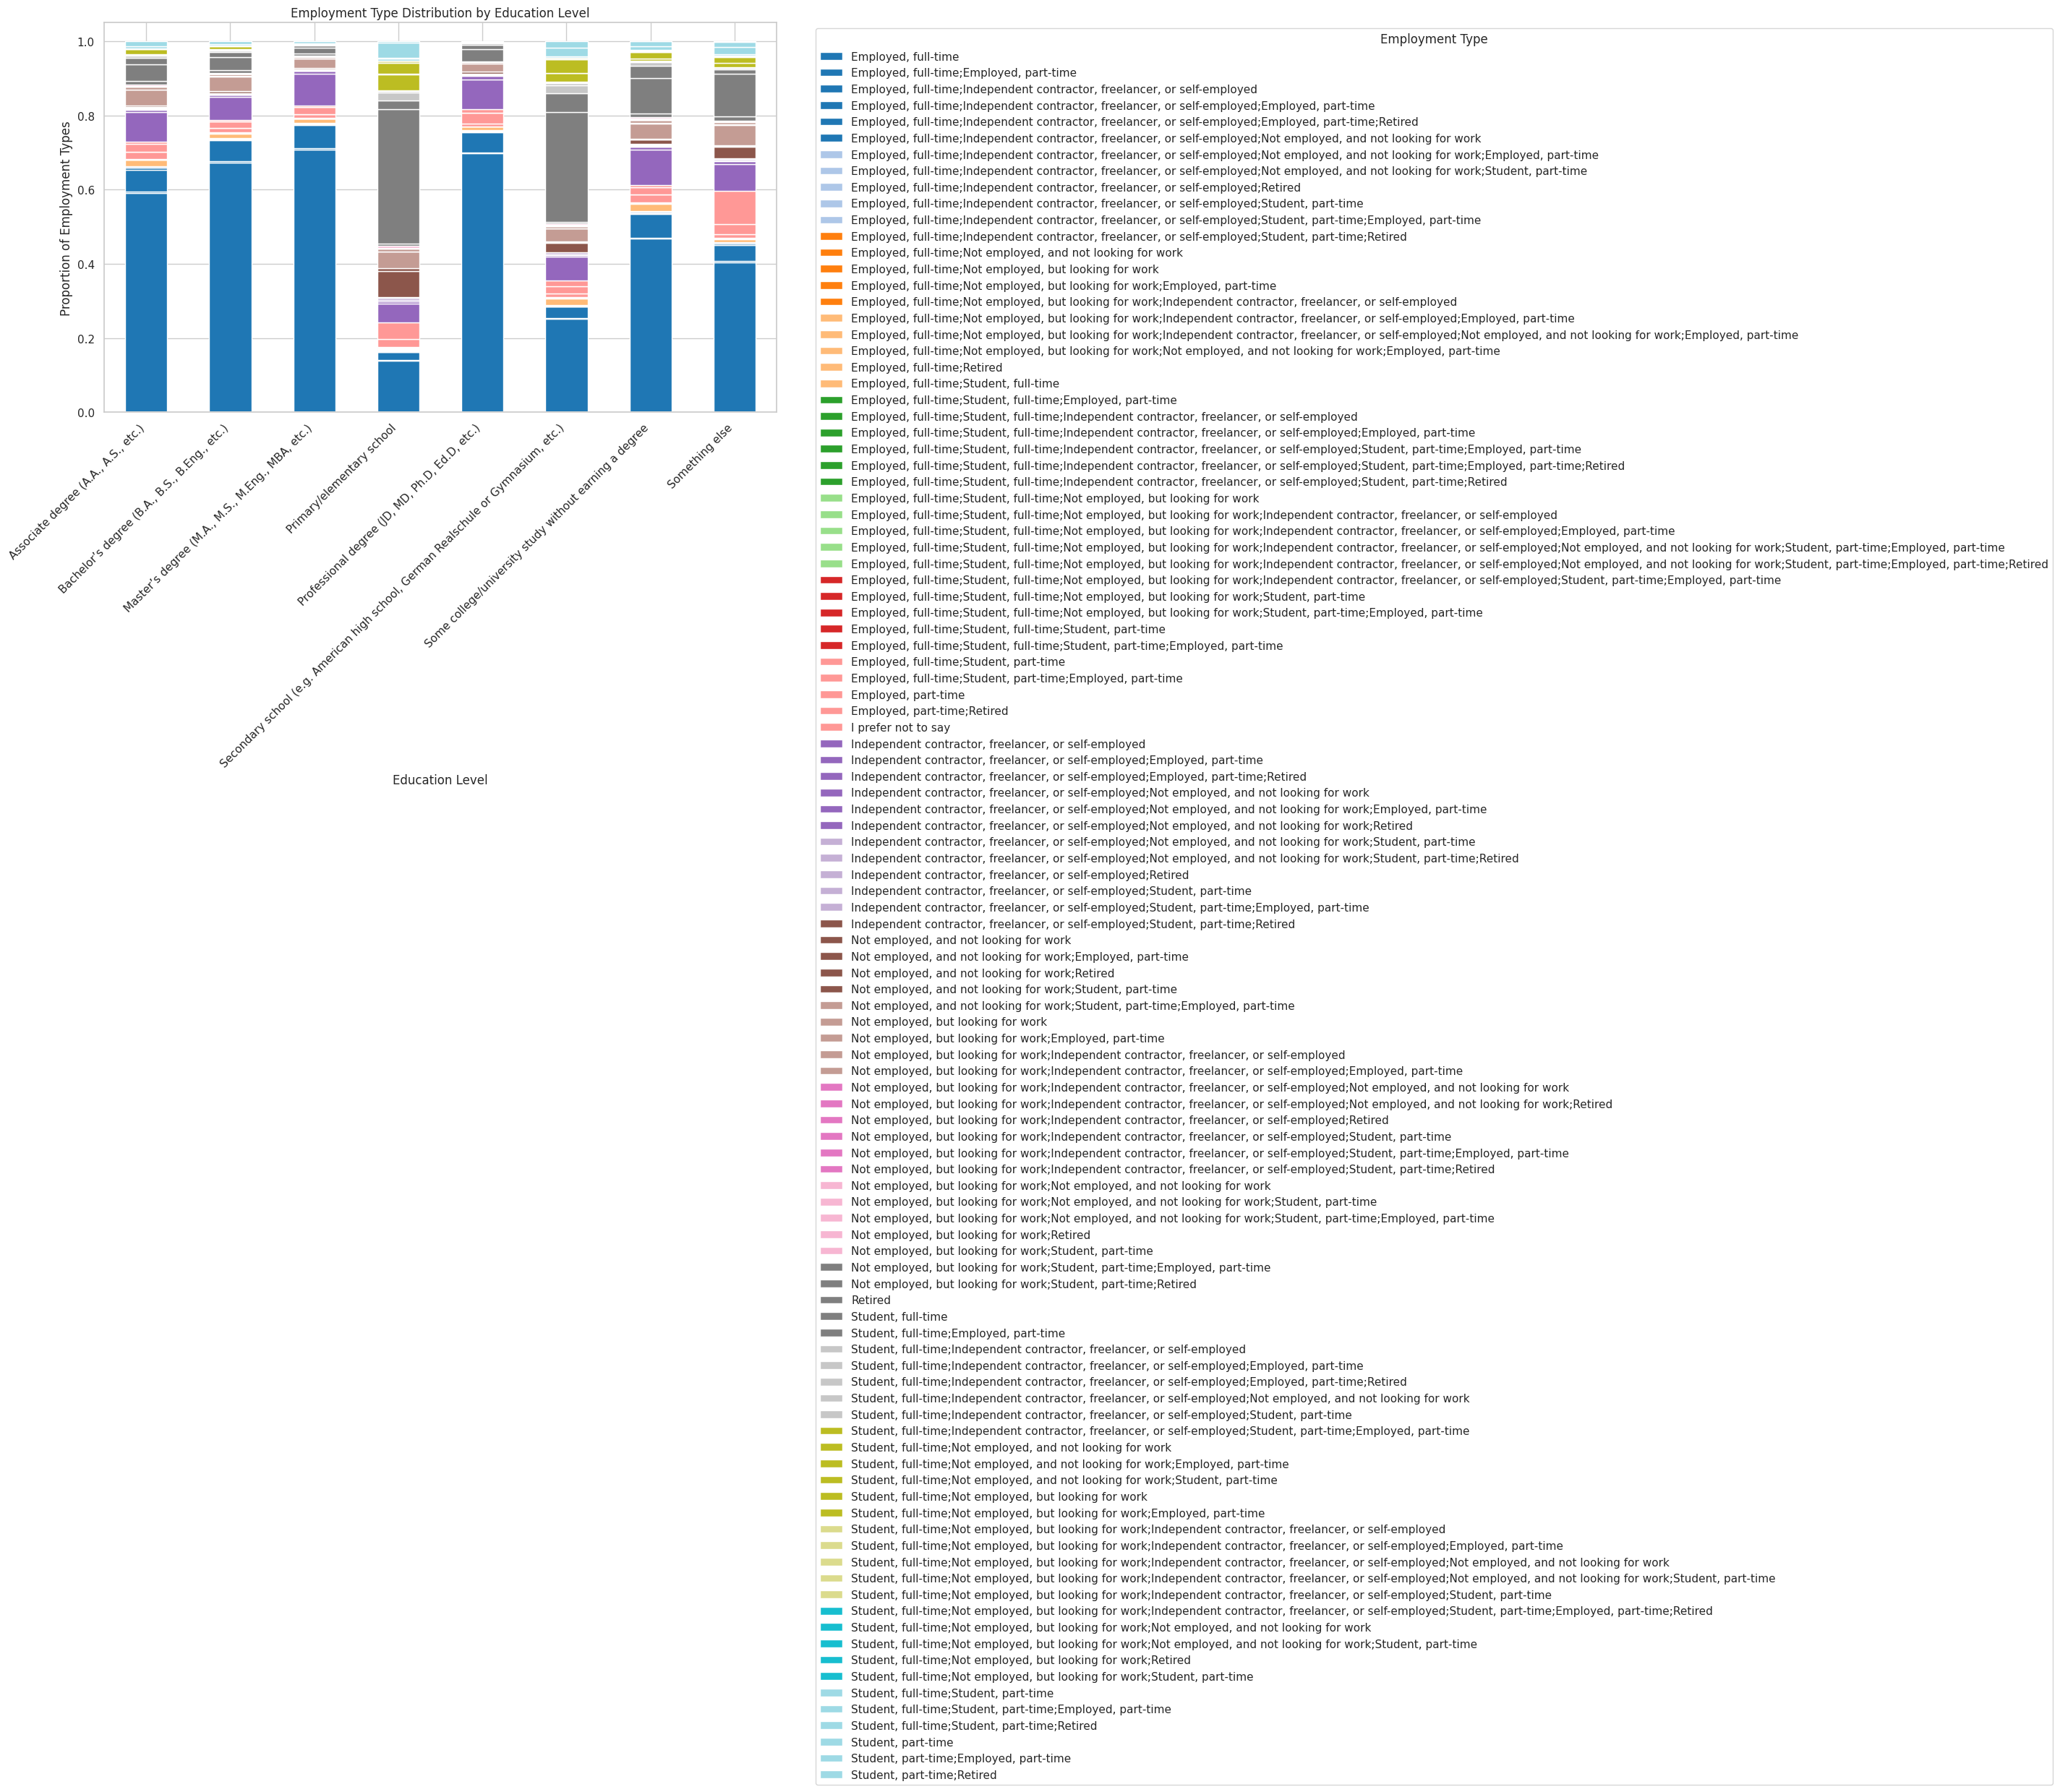

In [13]:

# Select relevant columns and drop missing values
df_subset = df[['EdLevel', 'Employment']].dropna()

# Cross-tabulation of Education Level vs Employment Type
crosstab = pd.crosstab(df_subset['EdLevel'], df_subset['Employment'])

print("Cross-tabulation: Education Level vs Employment Type\n")
print(crosstab)

# Normalize crosstab to show proportions (row-wise)
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot a stacked bar chart showing employment distribution per education level
crosstab_norm.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Employment Types')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [14]:
## Write your code here
# Save the modified DataFrame to a CSV file
df.to_csv('modified_stackoverflow_survey.csv', index=False)

print("Dataset saved as 'modified_stackoverflow_survey.csv'")


Dataset saved as 'modified_stackoverflow_survey.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
